<a href="https://colab.research.google.com/github/jeffreyboschman/heartAttackStats/blob/main/SQL%2BmachineLearningExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up database (SQLite)

This was my first time using SQL, so I wanted to practice and understand what is going on. I decided to use SQLite from the MacOS terminal command line.
1. The first step is to make sure SQLite installed. You can check the version with `sqlite3 --version` 
  - It should come bundled with Python, but if not you can do `brew install sqlite3`
2. The data that I want to put into a database is a heart attack analysis dataset from Kaggle (https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset). I downloaded them as csv files.(note: other good datasets https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)
3. Next we want to convert the .csv files into databases. 

  - 3a. Make the SQLite database
    - `$ sqlite3 stats.db` -> from the command line, creates a new database called `stats.db` and opens SQLite. In SQLite, all new commands will have the prompt `sqlite>` (see https://sqlite.org/cli.html)
    
    - Some useful SQLite dot-commands (not general SQL, only for SQLite): https://www.tutorialspoint.com/sqlite/sqlite_commands.htm
      - `.databases` -> to see what databases you have created
      - `.tables` -> to see what tables you have created
      - `.show` -> show the current values of the various settings
      - `.header on` -> turns header setting on
      - `.mode column` -> sets output mode to column
      - `.timer on` -> to see how long operations takes
      - `.quit` or `.exit` -> close SQLite

  - 3b. Create a new, empty table with the correct column names and datatypes
  
    - ```sqlite3
    CREATE TABLE heart(
    ...> age INTEGER,
    ...> sex INTEGER,
    ...> cp INTEGER,
    ...> trtbps INTEGER,
    ...> chol INTEGER,
    ...> fbs INTEGER,
    ...> restecg INTEGER,
    ...> thalachh INTEGER,
    ...> exng INTEGER,
    ...> oldpeak FLOAT,
    ...> slp INTEGER,
    ...> caa INTEGER,
    ...> thall INTEGER,
    ...> output INTEGER
    ...> );
    ``` 

  - 3c. Import the csv file `heart.csv` into the existing table called `heart`
    - `.mode csv` -> change to csv mode
    - `.import heart.csv heart`
    - `.schema heart` -> verify the structure of the table `heart` by showing the matching CREATE statement
    - `SELECT * FROM heart LIMIT 5;` -> verify the table contains the data from the csv by showing the first 5 rows. But oh wait, you may notice that the first line of the csv is imported as well as an entry.
    - `DELETE FROM heart LIMIT 1;` -> delete the first row
    - `SELECT * FROM heart LIMIT 5;` -> now you can see that the first row is just values

  - 3d. Do the same for `o2Saturation.csv`
    - ```sqlite3
    CREATE TABLE o2Sat(
    ...> o2Sa FLOAT 
    ...> );
    ```
    - `.mode csv`
    - `.import o2Saturation.csv o2Sat`
    - `SELECT * FROM o2Sat LIMIT 5;` -> this csv didn't have column names in the first row, so it should be good already
  
  - 3e. Close SQLite
    - `.quit` or `.exit`

4. Finally, we want to make sure we can access the `stats.db` database file later using this Google Colab / Jupyter Notebook. I'm just going to add it to a git respository. 


# Accessing database (sqlite3 library in Python) and making Pandas dataframes

Import some libraries (`sqlite3` is part of the standard library) and get the `stats.db` file from the last the step, which I put on git.

In [1]:
import sqlite3
import pandas as pd

!rm -rf heartAttackStats
!git clone https://github.com/jeffreyboschman/heartAttackStats.git

Cloning into 'heartAttackStats'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 59 (delta 28), reused 21 (delta 5), pack-reused 0
Unpacking objects: 100% (59/59), done.


Establish a connection to the stats.db file, and (optional) confirm the names of the tables inside it.

In [2]:
conn = sqlite3.connect('heartAttackStats/data/stats.db')
print("Opened database successfully");

cur = conn.cursor()  #creates a "cursor" that we can use to execuse SQL commands
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())
conn.close() #it is good practice to close the connection (even though my next step will need it, it is in a different code block)

Opened database successfully
[('heart',), ('o2Sat',)]


Directly create a Pandas dataframe from the SQL `stats.db` table named `heart`

In [3]:
conn = sqlite3.connect('heartAttackStats/data/stats.db')
heart_df = pd.read_sql_query("SELECT * FROM heart", conn)
conn.close()

heart_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Also creat a dataframe of the o2 Saturation data

In [4]:
conn = sqlite3.connect('heartAttackStats/data/stats.db')
o2_df = pd.read_sql_query("SELECT * FROM o2Sat", conn)
conn.close()

o2_df

,o2Sa
0,98.6
1,98.6
2,98.6
3,98.6
4,98.1
...,...
3581,98.6
3582,98.6
3583,98.6
3584,98.6


## Other method: Creating Pandas dataframes directly from csv files

Ya, it would have been much more straightfoward to have just created the Pandas dataframes directly from the csv files.  But, like I said, I wanted to practice SQL (and I'm already pretty familiar with Pandas)

In [5]:
heart_csv = pd.read_csv('/content/heartAttackStats/data/heart.csv')   
heart_df2 = pd.DataFrame(heart_csv)

heart_df2

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
o2_csv = pd.read_csv('/content/heartAttackStats/data/o2Saturation.csv', header=None)
o2_df2 = pd.DataFrame(o2_csv)

o2_df2

,0
0,98.6
1,98.6
2,98.6
3,98.6
4,98.1
...,...
3581,98.6
3582,98.6
3583,98.6
3584,98.6


As you can see, these dataframes are the exact same as those created from the SQLite database

# Next steps

So now let's do some data visualization and preliminary data analysis. Also, here are what the column values mean:
- `age`: Age of the patient 
- `sex`: Sex of the patient (0 = female, 1 = male) 
- `cp`: Chest pain type (0 = asymptomatic, 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain)
- `trtbps`: Resting blood pressure (in mm Hg) on admission to the hospital
- `chol`: Serum cholestoral in mg/dl fetched via BMI sensor 
- `fbs`: Is fasting blood sugar > 120 mg/dl? (0 = no, 1 = yes) 
- `restecg`: Resting electrocardiographic results (0 = hypertrophy, 1 = normal, 2 = having ST-T wave abnormality)
- `thalach`: Maximum heart rate achieved (bpm)
- `exng`: Exercise induced angina (i.e. is there chest pain after exercise?) (0 = no, 1 = yes) 
- `oldpeak`: ST depression induced by exercise relative to rest 
- `slp`: The slope of the peak exercise ST segment (0 = downsloping, 1 = flat, 2 = upsloping) 
- `caa`: Number of major vessels coloured by fluoroscopy (0-3; 4 is null)
- `thall`: 0 = null, 1 = fixed defect, 2 = normal, 3 = reversable defect
- `output`: Chance of heart attack (0 = lower chance of heart attack, 1 = higher chance)


##### First, I'll do some quick and dirty histograms with pandas to see the distrubutions of the various parameters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ec4630490>,
      dtype=object)

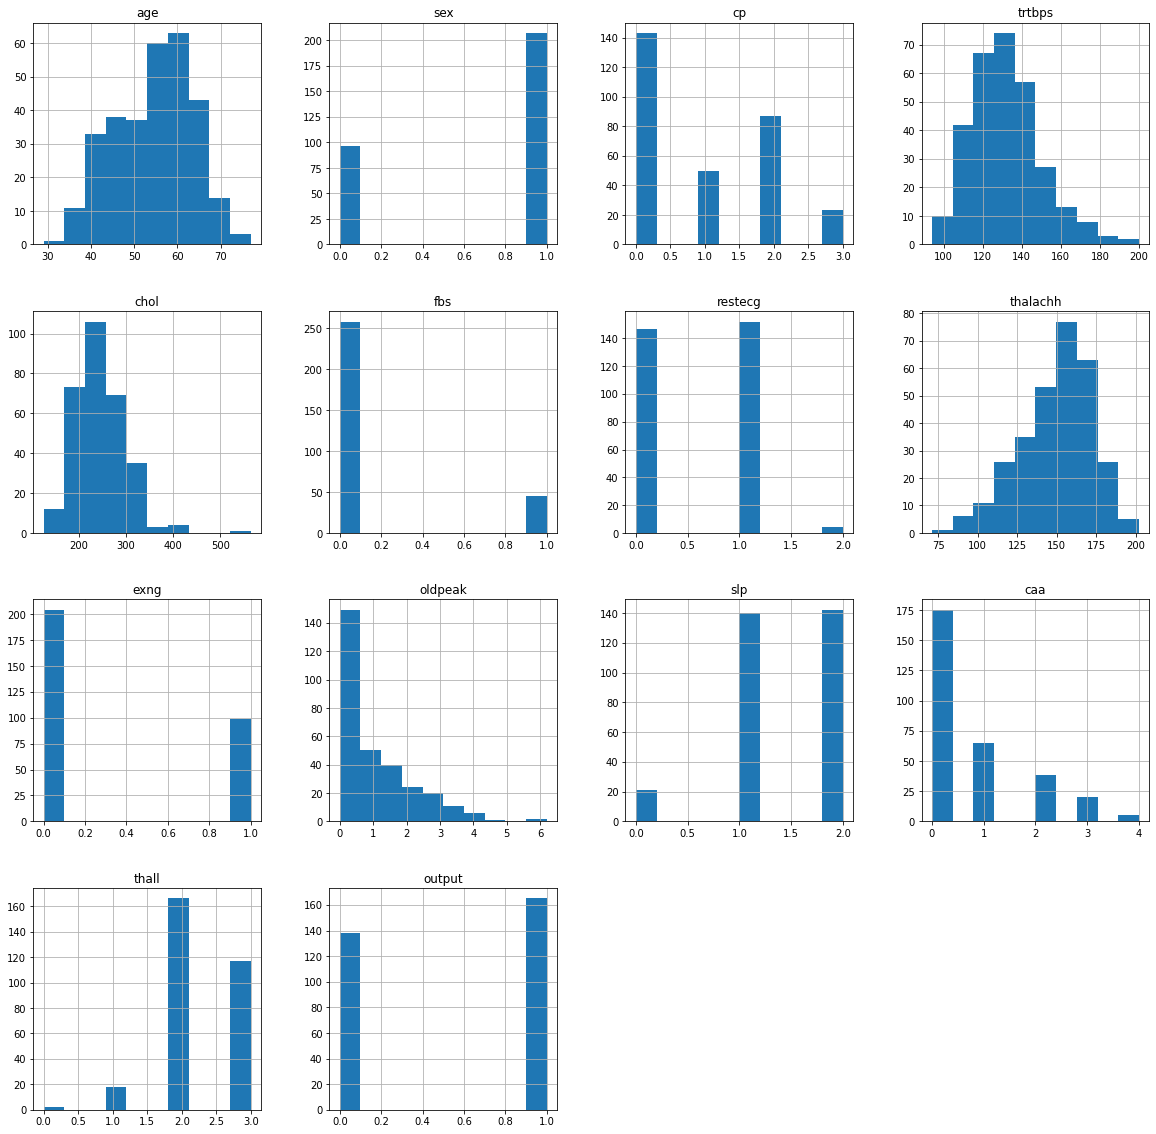

In [10]:
  heart_df.hist(figsize=(20,20))